In [1]:
import pandas as pd

df = pd.read_csv('2019.1 - Encuesta de remuneración salarial - Argentina.csv', skiprows=3)
df

,Me identifico,Tengo,Dónde estás trabajando,Años de experiencia,Años en la empresa actual,Años en el puesto actual,¿Gente a cargo?,Nivel de estudios alcanzado,Estado,Carrera,...,Orientación sexual,¿Tenés algún tipo de discapacidad?,¿Sentís que esto te dificultó el conseguir trabajo?,¿A qué eventos de tecnología asististe en el último año?,Cantidad de empleados,Actividad principal,¿La recomendás como un buen lugar para trabajar?,¿Cómo calificás las políticas de diversidad e inclusión?,¿A cuántos kilómetros de tu casa queda la oficina?,Beneficios extra
0,Hombre,22,Catamarca,2.0,1.0,1.0,0,Universitario,En curso,ING informática,...,Heterosexual,NaN,NaN,NaN,1001-2000,Producto basado en Software,8,9,2.0,Capacitaciones y/o cursos
1,Hombre,23,Catamarca,2.0,1.0,1.0,0,Secundario,Completado,Ing informática,...,Heterosexual,NaN,NaN,Charlas online,51-100,Producto basado en Software,8,10,2.0,"Capacitaciones y/o cursos, Licencia de paterni..."
2,Mujer,35,Chaco,8.0,7.0,2.0,2,Posgrado,En curso,MTI,...,dgsdg,NaN,No,varios,201-500,Otras industrias,4,4,0.2,"Capacitaciones y/o cursos, Licencia de paterni..."
3,Hombre,41,Chaco,20.0,2.0,10.0,0,Universitario,Completado,Lic en sistemas,...,Heterosexual,NaN,NaN,Ninguno,1-10,Servicios / Consultoría de Software / Digital,5,1,-1.0,"Horarios flexibles, Vacaciones flexibles (adic..."
4,Hombre,35,Chaco,5.0,3.0,2.0,0,Universitario,Completado,Analisis en Sistemas,...,Heterosexual,NaN,No,NaN,501-1000,Producto basado en Software,8,8,1.0,"Capacitaciones y/o cursos, Clases de idiomas, ..."
5,Hombre,38,Chaco,16.0,16.0,16.0,0,Terciario,Incompleto,Analista de Sistemas,...,Heterosexual,NaN,No,Ninguno,201-500,Otras industrias,6,4,2.0,Ninguna de las anteriores
6,Hombre,30,Chaco,9.0,5.0,5.0,3,Terciario,Completado,T S P,...,Heterosexual,NaN,No,NaN,201-500,Otras industrias,6,10,2.0,"Abono de celular y/o Internet, Comidas pagas/s..."
7,Hombre,32,Chaco,10.0,2.0,2.0,0,Universitario,Incompleto,Ing. en Sistemas,...,Heterosexual,NaN,NaN,Ninguno :(,1001-2000,Otras industrias,5,5,5.0,Ninguna de las anteriores
8,Hombre,28,Chaco,7.0,3.0,1.0,2,Universitario,Incompleto,Ingeniería en Sistemas,...,Heterosexual,NaN,No,NaN,51-100,Servicios / Consultoría de Software / Digital,10,5,-1.0,"Horarios flexibles, Vacaciones flexibles (adic..."
9,Hombre,29,Chaco,0.0,0.0,0.0,0,Universitario,En curso,Ingenieria en Sistemas,...,Heterosexual,NaN,No,NaN,501-1000,Producto basado en Software,5,5,3.0,Capacitaciones y/o cursos


In [2]:
import re #ahre
regex_replace_map = {
    '^(Ing\.?|In?geni?[ea]r([íi]a|a|o))( en| de|) (.*)$': 'Ingeniería en \\4',
    '^(Ing\.?|Ingeni?er([íi]a|a|o|))$': 'Ingeniería',
    '^[LI]ic(enciatura|enciad[ao]|\.|)( en| de|) (.*)$': 'Licenciatura en \\3',
    '^Analistas?( de| en) (.*)$': 'Analista de \\2',
    '^(Tec\.? |T[eé]cnic(atura|a|o))(.*)$': 'Tecnicatura\\3',
    '^(Dr\.?|Doctor(ado|a|))( en| de|) (.*)$': 'Doctorado en \\4',
    '^Contador(a|).*$': 'Contador Público',
    '^Programador(a|).*$': 'Programación',
    '^(Abocac[íi]a|abogad[ao])$': 'Abogacía',
    '^(.*)ing[\. ](.+)$': '\\1Ingeniería \\2',
    '^(.*)lic[\. ](.+)$': '\\1Licenciatura \\2',
    '^(.*)(mg|mag|magister|maestr[íi]a)[\. ](.+)$': '\\1Maestría \\3',
    '^(.*)informaci[óo]n(.*)$': '\\1Información\\2',
    '^(.*)computaci[óo]n(.*)$': '\\1Computación\\2',
    '^(.*)inform[áàa]tica(.*)$': '\\1Informática\\2',
    '^(.*)programaci[óo]n(.*)$': '\\1Programación\\2',
    '^(.*)licenciatura(.*)$': '\\1Licenciatura\\2',
    '^(.*)electr[óo]nica(.*)$': '\\1Electrónica\\2',
    '^(.*)el[ée]ctrica(.*)$': '\\1Eléctrica\\2',
    '^(.*)tecnolog[íi]a(.*)$': '\\1Tecnología\\2',
    '^(.*)administraci[óo]n(.*)$': '\\1Administración\\2',
    '^(.*)sistem[as]s(.*)$': '\\1Sistemas\\2',
    '^(.*)ingeniero[as](.*)$': '\\1Ingeniería\\2',
    '^(.*)analista(.*)$': '\\1Analista\\2',
    '^(.*)(adm|admin)[ \.](.*)$': '\\1Administración \\2',
    '^(.*)inform[aá]ticos(.*)$': '\\1Informáticos\\2',
    '^(.*)liciencia(.*)$': '\\1licencia\\2', # OMG!
    '^(.*)ciencias?(.*)$': '\\1Ciencias\\2',
    '^(.*)cs\.?(.+)$': '\\1Ciencias\\2',
    '^(.*)an[áàa]lisis(.*)$': '\\1Análisis\\2',
    '^(.*)gesti[óo]n(.*)$': '\\1Gestión\\2',
    '^(.*)ux(.*)$': '\\1UX\\2',
    '^(.*)superior(.*)$': '\\1Superior\\2',
    '^(.*)rrhh(.*)$': '\\1Recursos Humanos\\2',
    '^(.*)empresa(.*)$': '\\1Empresa\\2',
    '^(.*)im[áa]gen(.*)$': '\\1Imágen\\2',
    '^(.*)sonido(.*)$': '\\1Sonido\\2',
    '^(.*)diseño(.*)$': '\\1Diseño\\2',
    '^(.*)electr[óo]nico(.*)$': '\\1Electrónico\\2',
    '^(.*)seguridad(.*)$': '\\1Seguridad\\2',
    '^(.*)higiene(.*)$': '\\1Higiene\\2',
    '^(.*)mec[áa]nica(.*)$': '\\1Mecánica\\2',
    '^(.*)telecomunicaciones(.*)$': '\\1Telecomunicaciones\\2',
    '^(.*)teleinform[áa]tica(.*)$': '\\1Teleinformática\\2',
    '^(.*)industrial(.*)$': '\\1Industrial\\2',
    '^(.*)universitari(.*)$': '\\1Universitari\\2',
    '^(.*)gr[áa]fico(.*)$': '\\1Gráfico\\2',
    '^(.*)desarrollo(.*)$': '\\1Desarrollo\\2',
    '^(.*)software(.*)$': '\\1Software\\2',
    '^(.*)social(.*)$': '\\1Social\\2',
    '^traductor(a|ado|)( P[úu]blico| de .+)?$': 'Traductorado Público',
    '^(.*)p[úu]blico(.*)$': '\\1Público\\2',
    '^(.*)trabajo(.*)$': '\\1Trabajo\\2',
    '^(.*)sitio(.*)$': '\\1Sitio\\2',
    '^(.*)filosof[íi]a(.*)$': '\\1Filosofía\\2',
    '^(.*)redes(.*)$': '\\1Redes\\2',
    '^(.*)psicolog[íi]a(.*)$': '\\1Psicología\\2',
    '^(.*)programador(.*)$': '\\1Programador\\2',
    '^(.*)biom[ée]dic(.*)$': '\\1Biomédic\\2',
    '^(.*)web(.*)$': '\\1Web\\2',
    '^(.*)arte(.*)$': '\\1Arte\\2',
    '^(.*)dela(.*)$': '\\1de la\\2',
    '^(.*)en en(.*)$': '\\1 en \\2',
    '^(.*) de (.*)$': '\\1 de \\2',
    '^(.*) en (.*)$': '\\1 en \\2',
    '^(.*)comunica(dor|dora|ci[óo]n)(.*)$': '\\1Comunicación\\3',
    '^(.*)telecomunicaci[óo]n(es)?(.*)$': '\\1Telecomunicaciones\\3',
    '^(.*)visual(.*)$': '\\1Visual\\2',
    '^fot[óo]graf(a|o|ia|ía)$': 'Fotografía',
    '^(.*)  (.*)$': '\\1 \\2',
    '^(TSP|T S P|T\.S\.P\.?)$': 'Tecnicatura Superior en Programación',
    '^(TSU|T S U|T\.S\.U\.?)(.*)$': 'Tecnicatura Superior Universitaria\\2',
    '^(ISI|I S I|I\.S\.I\.?)$': 'Ingeniería en Sistemas de Información',
    '^(.*)T\.? sup[\.](.*)$': '\\1Tecnicatura Superior\\2',
    '^(Tecnicatura|Ingeniería)( en | )(Industrial|Civil|Electrónic[ao]|Biom[ée]dica|Eléctrica|Mecánica)$': '\\1 \\3',
    '^(Tecnicatura|Ingeniería) Electrónic[ao]$': '\\1 Electrónica',
    '^(Ingeniería|Licenciatura) en Sistemas?(| de Información| en Información| de la Información| Inform[áa]ticos)$': '\\1 en Sistemas de Información',
    '^(.*)Superior Programación(.*)$': '\\1Superior en Programación\\2',
    '^(.*)Tecnicatura Universitario(.*)$': '\\1Tecnicatura Universitaria\\2',
    '^(.*)Tecnicaturaen(.*)$': '\\1Tecnicatura en\\2',
    '^(.*)TecnicaturaSuperior(.*)$': '\\1Tecnicatura Superior\\2',
    '^(.*)TecnicaturaProgramación(.*)$': '\\1Tecnicatura en Programación\\2',
    '^Tecnicatura Programador(.*)$': 'Tecnicatura en Programación',
    '^(LCC|Ciencias Computación|Licenciatura en Computación|Ciencias de la Computación)$': 'Licenciatura en Ciencias de la Computación',
    '^(An[áa]lisis de Sistemas?|Analista( de|) Sistemas?).*$': 'Analista de Sistemas',
    '^(Diseñ(o|ador|adora) Multimedial?|Multimedia)$': 'Diseño Multimedial',
    '^(.*)Universitario en Sistemas(.*)$': '\\1Universitario de Sistemas\\2',
    '^(.*)\.$': '\\1',
}
for regex, pattern in regex_replace_map.items():
    compiled_regex = re.compile(regex, re.I)
    df['Carrera'] = df['Carrera'].str.strip().str.replace(compiled_regex, pattern)

In [3]:
regex_replace_map = {
    '(UTN|UTN .*|UTN ?F.*|Universidad Tec?nol[óo]gica Nacional( F.*)?)$': 'UTN',
    '(UBA|FIUBA|FCE-?UBA|Universidad de Buenos Aires|Buenos Aires)$': 'UBA',
    '(UNLP|Universidad Nacional de La Plata)$': 'UNLP',
    '(UNLaM|Universidad( Nacional|) de la Matanza|la matanza)$': 'UNLaM',
    '(UNS|Universidad Nacional del Sur)$': 'UNS',
    '(UNICEN|Universidad Nacional del Centro( de la (Provincia|Pcia\.?) de Buenos Aires)?)$': 'UNICEN',
    '(UNC|Universidad Nacional de C[óo]rdoba)$': 'UNC',
    '(UNRC|Universidad Nacional de R[ií]o Cuarto)$': 'UNRC',
    '(UNQ|Universidad Nacional de Quilmes|Unqui)$': 'UNQ',
    '(UADE|Universidad Argentina de la Empresa)$': 'UADE',
    '(UB|Universidad de Belgrano)$': 'UB',
    '(UK|(Universidad )?Kennedy)$': 'UK',
    '(UCES|Universidad de Ciencias Empresariales y Sociales)$': 'UCES',
    '(UM|Universidad de Mor[óo]n|Mor[óo]n)$': 'UM',
    '(UP|Universidad de Palermo|Palermo)$': 'UP',
    '(CAECE|UCAECE|Universidad CAECE)$': 'CAECE',
    '(ORT|ORT Argentina)$': 'ORT',
    '(UAI|(Universidad )?Abierta Interamericana)$': 'UAI',
    '(UBP|(Universidad )?Blas Pascal)$': 'UBP',
    '(Universidad )?(Maim[óo]nides)$': 'Maimónides',
    '(UNLA|.*Lan[úu]s)$': 'UNLA',
    '(UNL|(Universidad )?Nacional del Litoral)$': 'UNL',
    '(UNLu|Universidad Nacional de Luj[áa]n)$': 'UNLu',
    '((Escuela .?)?(Multimedial? )?)?Da ?Vinci$': 'DaVinci',
    '(Universidad )?(Siglo 21|Siglo XXI)$': 'Siglo 21',
    '(UA|(Universidad )?Austral)$': 'UNL',
    '(UA|(Universidad )?Austral)$': 'UNL',
    '(Istea)$': 'ISTEA',
    '(UAP|Universidad Adventista del Plata)': 'UAP',
    '(UNJu|Universidad Nacional de Jujuy)': 'UNJu',
    '(UNCUYO|Universidad Nacional de Cuyo)': 'UNCUYO',
    '(ISSD|Instituto Superior Santo Domingo)': 'ISSD',
    '(UNSAM|Universidad Nacional de San Mart[ií]n)': 'UNSAM',
    '(UNLAR|Universidad Nacional de La Rioja)': 'UNLaR',
    '(UNCOMA|Universidad Nacional del Comahue)': 'UNCOMA',
    '(UDA|Universidad del Aconcagua)': 'UDA',
    '(IUA|Instituto Universitario Aeronautico)': 'IUA',
    '(-)$': 'DELETEME',
}
for regex, pattern in regex_replace_map.items():
    compiled_regex = re.compile(regex, re.I)
    df['Universidad'] = df['Universidad'].str.strip().str.replace(compiled_regex, pattern)

In [4]:
def normalize_dataframe_column(df_in, column_name, regex_assign_map):
  """
  Given a Dataframe (df), a column name that identifies the column to sanitize,
  applies an in-place replacement for each pair regex-value in the map
  """
  df_out = df_in.copy()
  for regex, value in regex_assign_map.items():
    compiled_regex = re.compile(regex, re.I)
    mask = df_in[ column_name ].str.strip().str.match(compiled_regex, na=False)
    df_out.loc[ mask, column_name ] = value
  
  # debug
  total, final = len(df_in[column_name].unique()), len(df_out[column_name].unique())
  display('reduced in {:02f}'.format((total - final) / total))
  return df_out

def normalize_dataframe_column_replace(df_in, column_name, regex_replace_map):
  """
  Given a Dataframe (df), a column name that identifies the column to sanitize,
  applies an in-place replacement for each pair regex-value in the map
  """
  df_out = df_in.copy()
  for regex, pattern in regex_replace_map.items():
    compiled_regex = re.compile(regex, re.I)
    df_out[ column_name ] = df_out[ column_name ].str.strip().str.replace(compiled_regex, pattern)
  
  # debug
  total, final = len(df_in[column_name].unique()), len(df_out[column_name].unique())
  display('reduced in {:02f}'.format((total - final) / total))
  return df_out

df = normalize_dataframe_column(df, '¿Tenés algún tipo de discapacidad?', {
    '^(_|-|no( tengo)?|ningun[oa]|nada|0|)$': None,
    '.*auditiv[oa].*': 'Auditiva',
    '.*visual.*': 'Visual',
    'mental': 'Mental',
    'motriz': 'Motriz',
    'vis?c?eral': 'Visceral',
    '^no, solo mala vista$': None,
    '^no tengo ninguna discapacidad$': None,
    '^tolerancia$': None,
    '^no tengo discapacidad$': None,
    r'^en serio\?$': None,
    r'^idealismo\?$': None,
    r'^si soy lagarto$': None,
    r'^windows$': None,
    r'^social$': None,
    r'^no les interesa$': None,
    r'^edad$': None,
    r'^ninguna \¿Habia que llenar esta respuesta\?$': None,
})
df['¿Tenés algún tipo de discapacidad?'] = df['¿Tenés algún tipo de discapacidad?'].apply(lambda val: val if val in (None, 'Auditiva', 'Mental', 'Motriz', 'Vocal', 'Visceral') or not isinstance(val, str) else 'Otra')

'reduced in 0.586207'

In [5]:
df = normalize_dataframe_column(df, '¿A qué eventos de tecnología asististe en el último año?', {
    '^nerdear\.?la$': 'nerdearla',
    '^eko ?partys?$': 'ekoparty',
    '^pycon(?:ar)?$': 'pyconar',
    '^nodeconf(?:ar)?$': 'nodeconfar',
})

df['¿A qué eventos de tecnología asististe en el último año?'] = df['¿A qué eventos de tecnología asististe en el último año?'].apply(lambda val: val if val in (None, 'nerdearla', 'ekoparty', 'nodeconfar',) or not isinstance(val, str) else None)

'reduced in 0.030603'

In [6]:
df = df[df['Años de experiencia'] < 40]
df = df[df['Tengo'] < 80]
df = df[df['Años en la empresa actual'] < 40]
df = df[(df['Salario mensual BRUTO (en tu moneda local)'] >= 10000) & (df['Salario mensual BRUTO (en tu moneda local)'] <= 300000)]

In [7]:
d = {}
for key, tech in {
        'unix': ('Linux', '*BSD', 'AIX', 'OpenStack', 'Solaris', 'HP-UX'),
        'windows': ('Windows', 'Windows Server'),
        'vmware': ('VMWare',),
        'containers': ('Docker', 'Kubernetes'),
        'cloud': ('Azure', 'Amazon Web Services', 'Google Cloud Platform/App Engine', 'OpenStack', 'Heroku', 'IBM Cloud / Watson',),
        'firebase': ('Firebase',),
        'lambda': ('Serverless',),
    }.items():
    d['is_{}'.format(key)] = df['Plataformas'].apply(lambda x: int(any(map(lambda t: t in str(x), tech))))
    df['is_{}'.format(key)] = df['Plataformas'].apply(lambda x: int(any(map(lambda t: t in str(x), tech))))

In [8]:
d = {}
for key, tech in {
        'frontend': ('Javascript', 'HTML', 'CSS', 'jQuery'),
        'backend': ('Java', 'PHP', 'Python', '.NET', 'NodeJS', 'C#', 'Ruby', 'Perl', 'Go', 'Scala'),
        'other': ('VB*', 'C++', 'C,', 'ABAP'),
        'mobile': ('Swift', 'Objective-C')
    }.items():
    d['is_{}'.format(key)] = df['Lenguajes de programación'].apply(lambda x: int(any(map(lambda t: t in str(x), tech))))
    df['is_{}'.format(key)] = df['Lenguajes de programación'].apply(lambda x: int(any(map(lambda t: t in str(x), tech))))

In [9]:
d = {}
for key, tech in {
        'frontend_fw': ('Angular', 'React.js', 'Vue.js'),
        'backend_fw': ('Node.js', 'Django', 'Laravel'),
        'mobile_fw': ('Cordova',),
        '.net': ('.NET Core'),
        'cms': ('WordPress', 'Drupal'),
        'bigdata': ('Spark', 'Hadoop'),
        'ml': ('TensorFlow', 'Torch',),
    }.items():
    d['is_{}'.format(key)] = df['Frameworks, herramientas y librerías'].apply(lambda x: int(any(map(lambda t: t in str(x), tech))))
    df['is_{}'.format(key)] = df['Frameworks, herramientas y librerías'].apply(lambda x: int(any(map(lambda t: t in str(x), tech))))

In [10]:
d = {}
for key, tech in {
        'sql': ('MySQL', 'MSSQL', 'PostgreSQL', 'Oracle', 'MariaDB', 'Microsoft Azure', 'IBM Db2'),
        'nosql': ('MongoDB', 'ElasticSearch', 'Redis', 'Amazon DynamoDB', 'Cassandra', 'Google Cloud Storage'),
    }.items():
    d['is_{}'.format(key)] = df['Bases de datos'].apply(lambda x: int(any(map(lambda t: t in str(x), tech))))
    df['is_{}'.format(key)] = df['Bases de datos'].apply(lambda x: int(any(map(lambda t: t in str(x), tech))))

In [11]:
d = {}
for key, tech in {
        'selenium': ('Selenium',),
    }.items():
    d['is_{}'.format(key)] = df['QA / Testing'].apply(lambda x: int(any(map(lambda t: t in str(x), tech))))
    df['is_{}'.format(key)] = df['QA / Testing'].apply(lambda x: int(any(map(lambda t: t in str(x), tech))))

In [12]:
ide_count = {}
for x in df['IDEs'].dropna():
    for key in x.split(','):
        key = key.strip()
        ide_count[key] = ide_count.get(key, 0) + 1

In [13]:
ide_counts = pd.Series(ide_count).sort_values(ascending=True)
ide_counts = ide_counts[ide_counts > 200]

In [14]:
d = {}
for ide in ide_counts.index.tolist():
    key, tech = ide, (ide,)
    d['is_{}'.format(key)] = df['IDEs'].apply(lambda x: int(any(map(lambda t: t in str(x), tech))))
    df['is_{}'.format(key)] = df['IDEs'].apply(lambda x: int(any(map(lambda t: t in str(x), tech))))

In [15]:
df['studied'] = df.apply(lambda row: '{} {}'.format(row['Nivel de estudios alcanzado'], row['Estado']), axis=1)

In [16]:
import numpy as np
df['logsalary'] = np.log(df['Salario mensual BRUTO (en tu moneda local)'])

In [17]:
import category_encoders as ce
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

cols = [
    'Me identifico',
    'Tengo',
    'Dónde estás trabajando',
    '¿Gente a cargo?',
    'Carrera',
    'Universidad',
    'Realizaste cursos de especialización',
    '¿Contribuís a proyectos open source?',
    '¿Programás como hobbie?',
    'Trabajo de',
    '¿Qué SO usás en tu laptop/PC para trabajar?',
    '¿Y en tu celular?',
    'Tipo de contrato',
    '¿Sufriste o presenciaste situaciones de violencia laboral?',
    'Orientación sexual',
    '¿Tenés algún tipo de discapacidad?',
    '¿A qué eventos de tecnología asististe en el último año?',
    'Cantidad de empleados',
    'Actividad principal',
    'Años de experiencia', 'Años en la empresa actual', 'studied',
   'is_windows', 'is_lambda', 'is_vmware', 'is_containers', 'is_firebase',
   'is_unix', 'is_cloud', 'is_other', 'is_backend',
   'is_frontend', 'is_mobile', 'is_bigdata', 'is_.net', 'is_ml',
   'is_mobile_fw', 'is_frontend_fw', 'is_cms', 'is_backend_fw', 'is_sql',
   'is_nosql', 'is_selenium', 'is_PyCharm', 'is_Vi',
   'is_Atom', 'is_Android Studio', 'is_Eclipse', 'is_IntelliJ', 'is_Vim',
   'is_Notepad++', 'is_Sublime Text', 'is_Visual Studio']
pipeline = make_pipeline(
    ce.TargetEncoder(cols=cols),
    LinearRegression(),
)

cross_val_score(pipeline, df[cols], df['logsalary'], cv=5).mean()

0.5580483045075312

In [18]:
from sklearn.preprocessing import StandardScaler
pipeline = make_pipeline(
    ce.TargetEncoder(cols=cols),
    StandardScaler(),
    LinearRegression(),
)

cross_val_score(pipeline, df[cols], df['logsalary'], cv=5).mean()

0.5580483045075284

In [19]:
from sklearn.preprocessing import PowerTransformer, StandardScaler
pipeline = make_pipeline(
    ce.TargetEncoder(cols=cols),
    StandardScaler(),
    PowerTransformer(),
    LinearRegression(),
)

cross_val_score(pipeline, df[cols], df['logsalary'], cv=5).mean()

0.5507132683134934

In [20]:
from sklearn.decomposition import PCA

pipeline = make_pipeline(
    ce.TargetEncoder(cols=cols),
    PCA(),
    LinearRegression(),
)

cross_val_score(pipeline, df[cols], df['logsalary'], cv=5).mean()

0.5580483045075285

In [21]:
from sklearn.decomposition import PCA

pipeline = make_pipeline(
    ce.TargetEncoder(cols=cols),
    PCA(n_components='mle', svd_solver='full',),
    LinearRegression(),
)

cross_val_score(pipeline, df[cols], df['logsalary'], cv=5).mean()

0.5573225818881579

In [22]:
from sklearn.decomposition import PCA

pipeline = make_pipeline(
    ce.TargetEncoder(cols=cols),
    PCA(n_components=10),
    LinearRegression(),
)

cross_val_score(pipeline, df[cols], df['logsalary'], cv=5).mean()

0.522164256292186

In [23]:
from sklearn.decomposition import PCA

pipeline = make_pipeline(
    ce.TargetEncoder(cols=cols),
    PCA(n_components=30),
    LinearRegression(),
)

cross_val_score(pipeline, df[cols], df['logsalary'], cv=5).mean()

0.5486389483645602

In [24]:
import sklearn.ensemble

pipeline = make_pipeline(
    ce.TargetEncoder(cols=cols),
    sklearn.ensemble.RandomForestRegressor(n_estimators=100),
)

cross_val_score(pipeline, df[cols], df['logsalary'], cv=5).mean()

0.5458815945154648

In [25]:
import sklearn.ensemble

pipeline = make_pipeline(
    ce.TargetEncoder(cols=cols),
    PCA(n_components='mle', svd_solver='full',),
    sklearn.ensemble.RandomForestRegressor(n_estimators=100),
)

cross_val_score(pipeline, df[cols], df['logsalary'], cv=5).mean()

0.5359562607552648

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
import sklearn.manifold
tsne = sklearn.manifold.TSNE(n_components=2, init='pca', random_state=0)
Y = tsne.fit_transform(ce.TargetEncoder(cols=cols).fit_transform(df[cols], df['logsalary']))

(-74.42659552242593, 87.8063257470353, -61.36504766367392, 81.17658635996298)

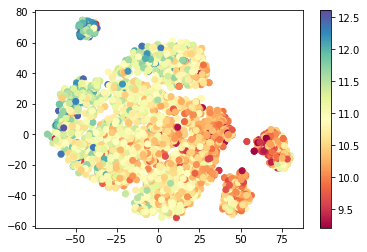

In [36]:
plt.scatter(Y[:, 0], Y[:, 1], c=df['logsalary'], cmap=plt.cm.Spectral)
plt.colorbar()
plt.axis('tight')

(-74.42659552242593, 87.8063257470353, -61.36504766367392, 81.17658635996298)

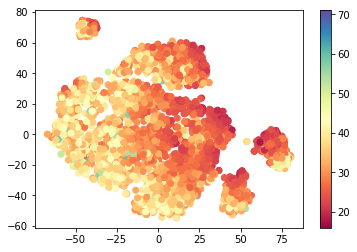

In [34]:
plt.scatter(Y[:, 0], Y[:, 1], c=df['Tengo'], cmap=plt.cm.Spectral)
plt.colorbar()
plt.axis('tight')

In [47]:
from statsmodels.stats.stattools import durbin_watson

pipeline = make_pipeline(
    ce.TargetEncoder(cols=cols),
    LinearRegression(),
)

pipeline.fit(df[cols], df['logsalary'])
resid = pd.DataFrame({'logsalary': df['logsalary'], 'resid': pipeline.predict(df[cols]) - df['logsalary']})
durbin_watson(resid.sort_values(by='logsalary')['resid'])

1.2234749563618033

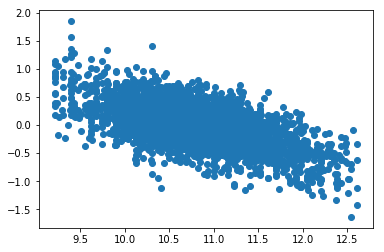

In [49]:
plt.scatter(resid['logsalary'], resid['resid']);

In [50]:
import sklearn.ensemble

pipeline = make_pipeline(
    ce.TargetEncoder(cols=cols),
    sklearn.ensemble.RandomForestRegressor(n_estimators=100),
)

pipeline.fit(df[cols], df['logsalary'])
resid = pd.DataFrame({'logsalary': df['logsalary'], 'resid': pipeline.predict(df[cols]) - df['logsalary']})
durbin_watson(resid.sort_values(by='logsalary')['resid'])

1.130217202013373

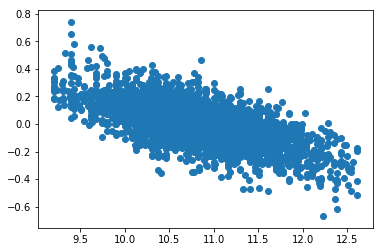

In [52]:
plt.scatter(resid['logsalary'], resid['resid']);